# Visualizing Data - Overview

Data visualization is the encoding of data into a diagram that allows it to be decoded visually to provide a perceptual representation of the data
- Comparison
- Estimation of magnitude
- Recognition of patterns, trends, outliers

![viz_overview.png](images/viz_overview.png)

For more info: http://euclid.psych.yorku.ca/www/psy6135/

Quantitative and categorical data can be encoded visually and their effectivenesss varies depending on the type of encoding chosen
- For `quantitative data`, positions on a common scale (e.g. x/y axis) are more effective
- For `categorical data`, spatial positions or colors are more effective

![viz_encoding.png](images/viz_encoding.png)

Source: https://www.cs.ubc.ca/~tmm/vadbook/

A framework for data visualization was established by Leland Wilkinson in 2005 using concepts from natural language
- grammar/syntax: consistent, minimal rules for construction of sentences
- semantics: establishing meaning of sentences

This formal theory established as system for describing the components of graphs, and the manner that they can be combined, known as the **grammar of graphics** (GoG or gg)
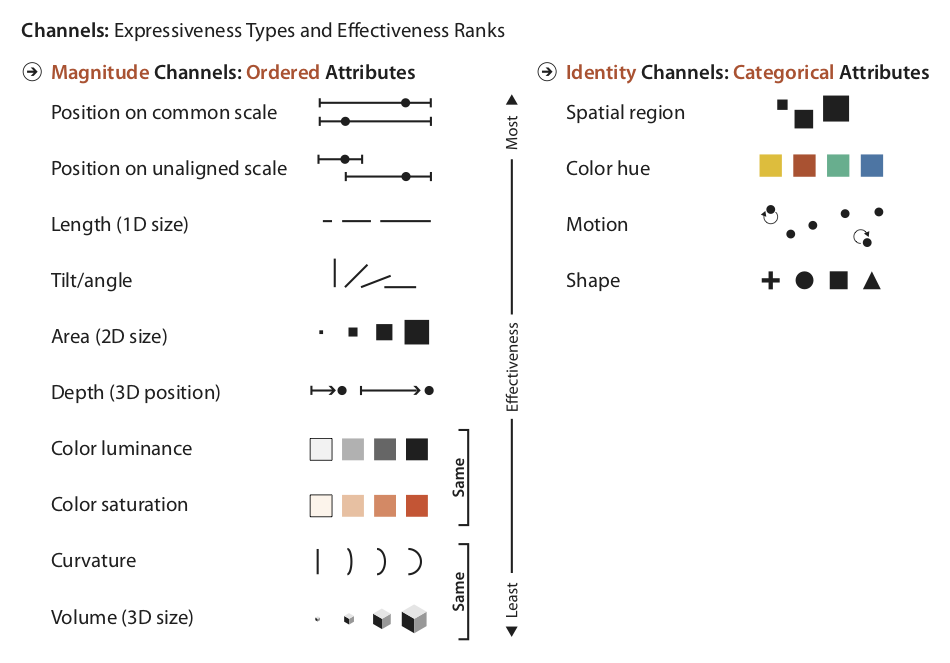
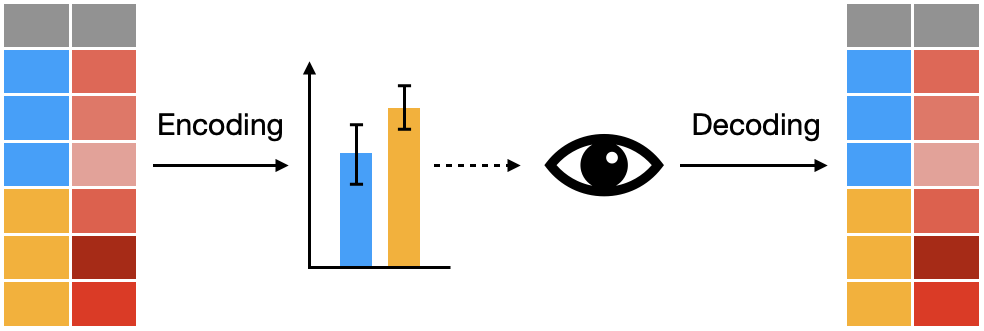

---
## What is `ggplot` in tidyverse?

`ggplot` is the implementation of the grammar of graphics in R using the concept of `layers`

![ggplot_layers.png](images/ggplot_layers.png)

- Basic layers
  - `Data`
  - `Aesthetics`: x, y, color, shape from data
  - `Geometry`: types of plots (scatter, line, bar,..)
- Additional layers
  - `Statistics`: summary statistics, models
  - `Coordinates`: plotting space (default = cartesian)
  - `Facets`: splitting plots by groups
  - `Themes`: overall look of plots

From: http://euclid.psych.yorku.ca/www/psy6135/lectures/Language.pdf

---
## Making plots using `ggplot`

Every plot is built from a combination of building blocks or layers, connected by `+`

A basic plot would include the following
- `data`: a tidy dataframe
- `aes`: aesthetic mapping of variables to x, y, color, size
- `geom`: geometry of plot (e.g. point, bar, histogram)
- `coordinate`: if not specified, default is cartesian

![ggplot_syntax.png](images/ggplot_syntax.png)

An example of a basic scatterplot of `data` can be written as

```
data %>% ggplot(aes(x=A, y=B, color=C, size=A) +
         geom_point()
```

From these basic layers, additional layers can be added to form the final plot

![ggplot_template.png](images/ggplot_template.png)

For a cheatsheet of the syntax and available layers, see: https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf


---
## Data preparation

We will illustrate the use of `ggplot` and the concept of layers using an example dataset

We will import a dataset from the Framingham study, which was a long term study of cardiovascular disease about subjects in Framingham, USA. In this dataset
- ~4000 subjects followed up and clinical data and chronic heart disease outcomes were examined longitudinally over > 10 years

The variables include

- `male` : 0 = female, 1 = male
- `age` : Age at the time of medical examination in years.
- `education` : 1 = Some high school, 2 = high school/GED, 3 = some college/vocational school, 4 = college
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke 
- `prevalentHyp`: Prevalent Hypertensive
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)

In [ ]:
library(tidyverse)

data <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/framingham.csv")

# renaming column & changing data type of columns
data <- data %>% 
        rename(sex = male) %>% 
        mutate(sex = as.factor(sex),
               age = as.integer(age),
               education = as.factor(education),
               currentSmoker = as.factor(currentSmoker),
               cigsPerDay = as.integer(cigsPerDay),
               BPMeds = as.factor(BPMeds),
               prevalentStroke = as.factor(prevalentStroke),
               prevalentHyp = as.factor(prevalentHyp),
               diabetes = as.factor(diabetes),
               totChol = as.integer(totChol),
               heartRate = as.integer(heartRate),
               TenYearCHD = as.factor(TenYearCHD)
               )

# transforming any units
data <- data %>% 
        mutate(glucose = round(glucose/18, digits=1)) %>% # mg/dL to mmol/L
        mutate(totChol = round(totChol/39, digits=1))     # mg/dL to mmol/L

head(data)

---
## Basic layers

We will build a simple plot with basic layers that are required
- `ggplot`: base function
- `aes`: aesthetic mapping of variables
- `geometry`: geometry for plotting

In [ ]:
data %>% ggplot() # equivalent to ggplot(data)

### 1. Mapping variables

The `aes` maps the data values to the plot. Typically, we have
- `x`
- `y`
- `color`
- `fill`
- `shape`
- `size`

In [ ]:
data %>% ggplot(aes(x=BMI, y=glucose)) # mapping of variables

Note that the data is not plotted because we have not specified a `geometry` layer

### 2. Geom layer for plotting

The geom layer specifies how we want to plot the data. We will use `geom_point` as an example

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose)) + # mapping of variables
  geom_point()                  # geom object

### Modifying mapping and geom attributes

We can specify attributes to the geom layers. In this case, we will specify the `color` of the points

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose)) + # mapping of variables
  geom_point(color="red")       # modifying geom object

If we want the color to represent data (e.g. `categorical` values), we specify `color` attribute under `aes` mapping, either in the `ggplot` layer or the `geom` layer

In [ ]:
# aes in the geom layer

data %>% 
ggplot(aes(x=BMI, y=glucose)) + 
  geom_point(aes(color=sex))   # here, color is mapped to sex (categorical)     

In [ ]:
# aes in the ggplot layer

data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)  
  geom_point()      

---
## Adding layers

### 1. Coord layer

We can change the coordinates of the plot by adding a `coord` layer
- In this example, we will add a `coord_cartesian` layer to specify the limits of the plot

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # mapping
  geom_point() +                     # geom object
  coord_cartesian(xlim = c(0,100),   # coord layer (limits)
                  ylim = c(0,50))

We can add the `coord_flip` layer to swap the x and y axes

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # mapping
  geom_point() +      # geom object
  coord_flip()        # coord layer (swapping x and y)

We can also plot the data using polar coordinates using `coord_polar`

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # mapping
  geom_point() +      # geom object
  coord_polar()       # polar coordinates

### 2. Geom layer

As seen previously, the `geom` layer plots the data. 

Different `geom` layers can be added, for example here, we are adding 
- `geom_hline` for horizontal line specified by `yintercept`
- `geom_vline` for vertical line specified by `xintercept`

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                     # geom object
  geom_hline(yintercept = 11.1) +    # layering another geom object
  geom_vline(xintercept = 30)        # layering another geom object

### 3. Stat layer

We can also add statistical summary plots using stat layers. In this example, we will add a linear regression line using the `stat_smooth` layer and specifying `method="lm"`

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                   # geom object
  geom_hline(yintercept = 11.1) +  # layering another geom object
  geom_vline(xintercept = 30) +    # layering another geom object
  stat_smooth(method="lm")         # stat summary layer (linear regression)

### 4. Facet layer

To show several plots that are split by groups, we can add a `facet` layer via `facet_grid`. We will explore how to specify the layout in a later notebook

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                    # geom object
  geom_hline(yintercept = 11.1) +   # layering another geom object
  geom_vline(xintercept = 30) +     # layering another geom object
  stat_smooth(method="lm") +        # stat summary layer (linear regression)
  facet_grid(.~sex)                 # facet layer to split plots by category

### 5. Scale layer

In some cases, we would plot the data points on a different scale and we can do this by adding a `scale` layer
- In this example, we will plot the x and y axes on a log10 scale by adding the `scale_x_log10` and `scale_y_log10` layers

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                    # geom object
  geom_hline(yintercept = 11.1) +   # layering another geom object
  geom_vline(xintercept = 30) +     # layering another geom object
  stat_smooth(method="lm") +        # stat summary layer (linear regression)
  facet_grid(.~sex) +               # facet layer to split plots by category
  scale_x_log10() +                 # scale layer (log transform)
  scale_y_log10()

### 6. Theme layer

Finally, we can change the overall look of a plot by adding the `theme` layer

For example
- `theme_classic`
- `theme_minimal`
- `theme_grey` (default)

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                    # geom object
  geom_hline(yintercept = 11.1) +   # layering another geom object
  geom_vline(xintercept = 30) +     # layering another geom object
  stat_smooth(method="lm") +        # stat summary layer (linear regression)
  facet_grid(.~sex) +               # facet layer to split plots by category
  scale_x_log10() +                 # scale layer (log transform)
  scale_y_log10() +
  theme_minimal()                   # theme layer (look)

We can change the size of the fonts for the axes/labels by specifying the `base_size` font (e.g. 16)

In [ ]:
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                    # geom object
  geom_hline(yintercept = 11.1) +   # layering another geom object
  geom_vline(xintercept = 30) +     # layering another geom object
  stat_smooth(method="lm") +        # stat summary layer (linear regression)
  facet_grid(.~sex) +               # facet layer to split plots by category
  scale_x_log10() +                 # scale layer (log transform)
  scale_y_log10() +
  theme_minimal(base_size=16)       # theme layer (modify size of fonts)

---
## Overall size of plots

In the notebook, the size of the plots defaults to width x height of 7 x 7. 
- We can override this using the `options` function to specify the `repr.plot.width` and `repr.plot.height` dimensions

In [ ]:
# specify dimensions of the plot
options(repr.plot.width=10, repr.plot.height=5)

# plot
data %>% 
ggplot(aes(x=BMI, y=glucose, color=sex)) + # here, color is mapped to sex (categorical)
  geom_point() +                    # geom object
  geom_hline(yintercept = 11.1) +   # layering another geom object
  geom_vline(xintercept = 30) +     # layering another geom object
  stat_smooth(method="lm") +        # stat summary layer (linear regression)
  facet_grid(.~sex) +               # facet layer to split plots by category
  scale_x_log10() +                 # scale layer (log transform)
  scale_y_log10() +
  theme_minimal(base_size=16)       # theme layer (modify size of fonts)